# Cars4U Project

#### Problem Context & Definition

There is a huge demand for used cars in the Indian market today. As sales of new cars have slowed over the past few years, the pre-owned car market has continued to grow and is now larger than the new car market. Technology start-up Cars4U aims to gain a foothold in this market.

Build a pricing model that can effectively predict the price of used cars, which can help Cars4U in devising profitable strategies using differential pricing.

#### Data Dictionary / Feature Info

- S.No.:  Serial number
- Name:  Name of the car which includes brand name and model name
- Location:  Location in which the car is being sold or is available for purchase (cities)
- Year:  Manufacturing year of the car
- Kilometers_driven:  The total kilometers driven in the car by the previous owner(s) in km
- Fuel_Type:  The type of fuel used by the car (Petrol, Diesel, Electric, CNG, LPG)
- Transmission:  The type of transmission used by the car (Automatic/Manual)
- Owner:  Type of ownership
- Mileage:  The standard mileage offered by the car company in kmpl or km/kg
- Engine:  The displacement volume of the engine in CC
- Power:  The maximum power of the engine in bhp
- Seats:  The number of seats in the car
- New_Price:  The price of a new car of the same model in INR Lakhs (1 Lakh INR = 100,000 INR)
- Price:  The price of the used car in INR Lakhs

#### Key Questions
- Which features have a significant impact on the price of used cars?
- Can a linear regression model help predict the price of used cars?
- Are the listed features sufficient in building an effective model? 
- Or do we need more information and additional features (for more granularity)?

### Import Libraries

In [1]:
# import appropriate libraries
import numpy as np   
import pandas as pd    
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import warnings
warnings.filterwarnings("ignore")

pd.set_option("display.max_columns", None)   # removes limit for number of displayed columns
pd.set_option("display.max_rows", 200)   # sets limit for number of displayed rows to 200

### Inspect Dataset Structure

In [2]:
used_cars_data = pd.read_csv("used_cars_data.csv")   # load dataset

In [3]:
df0 = used_cars_data.copy()   # copy dataset to dataframe and initialize

In [4]:
print(f"Dataset has {df0.shape[0]} rows and {df0.shape[1]} columns")   # check data shape (rows and columns)

Dataset has 7253 rows and 14 columns


In [5]:
df0.head()   # check first 5 rows

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [6]:
df0.tail()   # check last 5 rows

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
7248,7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN,NaN
7249,7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.6 bhp,5.0,NaN,NaN
7250,7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN,NaN
7251,7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,103.6 bhp,5.0,NaN,NaN
7252,7252,Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...,Kochi,2014,72443,Diesel,Automatic,First,10.0 kmpl,2148 CC,170 bhp,5.0,NaN,NaN


In [7]:
df0.sample(10)   # generate a random sample of 10 rows

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
5089,5089,Mercedes-Benz New C-Class 220 CDI AT,Kolkata,2012,22000,Diesel,Automatic,First,14.84 kmpl,2143 CC,170 bhp,5.0,NaN,14.00
6402,6402,Maruti Swift Dzire Tour LDI,Pune,2013,170000,Diesel,Manual,Second,23.4 kmpl,1248 CC,74 bhp,5.0,NaN,NaN
1867,1867,Honda City i DTEC SV,Kochi,2016,55700,Diesel,Manual,First,26.0 kmpl,1498 CC,98.6 bhp,5.0,NaN,7.52
1563,1563,Maruti Alto LXi BSIII,Coimbatore,2010,59136,Petrol,Manual,First,19.7 kmpl,796 CC,46.3 bhp,5.0,NaN,2.96
4421,4421,Toyota Corolla 1.8 J,Delhi,2015,12000,Petrol,Manual,First,14.53 kmpl,1798 CC,138 bhp,5.0,NaN,11.00
3546,3546,Mahindra Scorpio VLX 4WD AIRBAG AT BSIV,Coimbatore,2011,108905,Diesel,Automatic,Second,11.79 kmpl,2179 CC,120 bhp,8.0,NaN,6.21
2709,2709,Honda Amaze V Petrol,Kochi,2016,40866,Petrol,Manual,First,19.5 kmpl,1199 CC,86.76 bhp,5.0,8.16 Lakh,5.47
3472,3472,Honda Accord 2.4 AT,Chennai,2011,85000,Petrol,Automatic,Second,11.7 kmpl,2354 CC,177.6 bhp,5.0,NaN,7.50
2673,2673,Skoda Octavia Elegance 2.0 TDI AT,Ahmedabad,2015,71826,Diesel,Automatic,First,19.3 kmpl,1968 CC,141 bhp,5.0,NaN,15.50
669,669,Honda City i VTEC S,Pune,2014,58407,Petrol,Manual,First,17.4 kmpl,1497 CC,117.3 bhp,5.0,NaN,6.16


In [8]:
df0.info()   # check missing values and data types for each feature

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7078 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 793.4+ KB


In [9]:
df0.isnull().sum()   # confirm missing values for each feature

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                 175
Seats                  53
New_Price            6247
Price                1234
dtype: int64

In [10]:
df0.duplicated().sum()   # check for duplicates

0

In [11]:
# check unique value counts for each categorical feature

cat_cols = ['Location', 'Year', 'Fuel_Type', 'Transmission', 'Owner_Type']
for columns in cat_cols:
    print(df0[columns].value_counts(ascending=False), '\n')

Mumbai        949
Hyderabad     876
Coimbatore    772
Kochi         772
Pune          765
Delhi         660
Kolkata       654
Chennai       591
Jaipur        499
Bangalore     440
Ahmedabad     275
Name: Location, dtype: int64 

2015    929
2014    925
2016    886
2013    791
2017    709
2012    690
2011    579
2010    407
2018    361
2009    252
2008    207
2007    148
2019    119
2006     89
2005     68
2004     35
2003     20
2002     18
2001      8
2000      5
1998      4
1999      2
1996      1
Name: Year, dtype: int64 

Diesel      3852
Petrol      3325
CNG           62
LPG           12
Electric       2
Name: Fuel_Type, dtype: int64 

Manual       5204
Automatic    2049
Name: Transmission, dtype: int64 

First             5952
Second            1152
Third              137
Fourth & Above      12
Name: Owner_Type, dtype: int64 



In [12]:
df0.describe(include="all").T   # check initial statistical summary

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
S.No.,7253.0,NaN,NaN,NaN,3626.0,2093.905084,0.0,1813.0,3626.0,5439.0,7252.0
Name,7253,2041,Mahindra XUV500 W8 2WD,55,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Location,7253,11,Mumbai,949,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,7253.0,NaN,NaN,NaN,2013.365366,3.254421,1996.0,2011.0,2014.0,2016.0,2019.0
Kilometers_Driven,7253.0,NaN,NaN,NaN,58699.063146,84427.720583,171.0,34000.0,53416.0,73000.0,6500000.0
Fuel_Type,7253,5,Diesel,3852,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Transmission,7253,2,Manual,5204,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Owner_Type,7253,4,First,5952,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mileage,7251,450,17.0 kmpl,207,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Engine,7207,150,1197 CC,732,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Observations
- Missing values in Mileage, Engine, Power, Seats, New_Price and Price.
- New_Price is missing over 86% values, so probably wiser to drop entire column than try to impute such high numbers.
- Price has many missing values which should be dropped rather than imputed since it is the target variable.
- Kilometers_Driven Max value indicates potential outlier; need to investigate further.
- Seats Min value shows "0.0" which seems to be erroneous data; Min value should be atleast 1 seat for driver.
- Need to strip units from Mileage, Engine and Power and convert to numerical data types.

### Data Preprocessing

In [13]:
df0.drop(['New_Price'], axis=1, inplace=True)   # drop New_Price since over 86% values are missing

In [14]:
df0.dropna(subset=['Price'], inplace=True)   # since Price is target variable, remove rows with missing prices

In [15]:
df0.isnull().sum()   # check updated missing values

S.No.                  0
Name                   0
Location               0
Year                   0
Kilometers_Driven      0
Fuel_Type              0
Transmission           0
Owner_Type             0
Mileage                2
Engine                36
Power                143
Seats                 42
Price                  0
dtype: int64

In [16]:
# strip units of measurement from Mileage, Engine and Power

df0['Mileage'] = df0['Mileage'].str.strip(' kmpl')
df0['Mileage'] = df0['Mileage'].str.strip(' km/kg')
df0['Engine'] = df0['Engine'].str.strip(' CC')
df0['Power'] = df0['Power'].str.strip(' bhp')

In [17]:
# then convert data types from string to float

df0['Mileage'] =df0['Mileage'].astype(float)
df0['Engine'] =df0['Engine'].astype(float)
df0['Power'] =df0['Power'].astype(float)

In [18]:
# also convert data types from object to category for Location, Fuel_Type, Transmission and Owner_Type

df0['Location'] = df0['Location'].astype('category')
df0['Fuel_Type'] = df0['Fuel_Type'].astype('category')
df0['Transmission'] = df0['Transmission'].astype('category')
df0['Owner_Type'] = df0['Owner_Type'].astype('category')

In [19]:
df0.dtypes   # check updated data types

S.No.                   int64
Name                   object
Location             category
Year                    int64
Kilometers_Driven       int64
Fuel_Type            category
Transmission         category
Owner_Type           category
Mileage               float64
Engine                float64
Power                 float64
Seats                 float64
Price                 float64
dtype: object

In [20]:
df0.describe(include='all').T   # check updated statistical summary

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
S.No.,6019.0,NaN,NaN,NaN,3009.0,1737.679967,0.0,1504.5,3009.0,4513.5,6018.0
Name,6019,1876,Mahindra XUV500 W8 2WD,49,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Location,6019,11,Mumbai,790,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,6019.0,NaN,NaN,NaN,2013.358199,3.269742,1998.0,2011.0,2014.0,2016.0,2019.0
Kilometers_Driven,6019.0,NaN,NaN,NaN,58738.380296,91268.843206,171.0,34000.0,53000.0,73000.0,6500000.0
Fuel_Type,6019,5,Diesel,3205,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Transmission,6019,2,Manual,4299,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Owner_Type,6019,4,First,4929,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mileage,6017.0,NaN,NaN,NaN,18.134961,4.582289,0.0,15.17,18.15,21.1,33.54
Engine,5983.0,NaN,NaN,NaN,1621.27645,601.355233,72.0,1198.0,1493.0,1984.0,5998.0


#### Observations
- Mileage and Seats Min values show "0.0" which seems to be erroneous data.
- Check for more "0.0" values and convert all to null (Nan) values, which can then be imputed with median values.
- Check for outliers in Kilometers_Driven; remove if nonsensical data or treat as missing values.

In [21]:
# check how many instances of 0.0 there are for the below numerical features

print("Mileage instances of 0.0: ", df0.query('Mileage == 0.0')['Mileage'].count())
print("Engine instances of 0.0: ", df0.query('Engine == 0.0')['Engine'].count())
print("Power instances of 0.0: ", df0.query('Power == 0.0')['Power'].count())
print("Seats instances of 0.0: ", df0.query('Seats == 0.0')['Seats'].count())

Mileage instances of 0.0:  68
Engine instances of 0.0:  0
Power instances of 0.0:  0
Seats instances of 0.0:  1


In [22]:
df0.loc[df0['Mileage'] == 0.0, 'Mileage'] = np.nan   # assign null value (NaN) to every instance of 0.0

In [23]:
df0.loc[df0['Seats'] == 0.0, 'Seats'] = np.nan   # assign null value (NaN) to every instance of 0.0

In [24]:
df0.isnull().sum()   # check updated missing values

S.No.                  0
Name                   0
Location               0
Year                   0
Kilometers_Driven      0
Fuel_Type              0
Transmission           0
Owner_Type             0
Mileage               70
Engine                36
Power                143
Seats                 43
Price                  0
dtype: int64

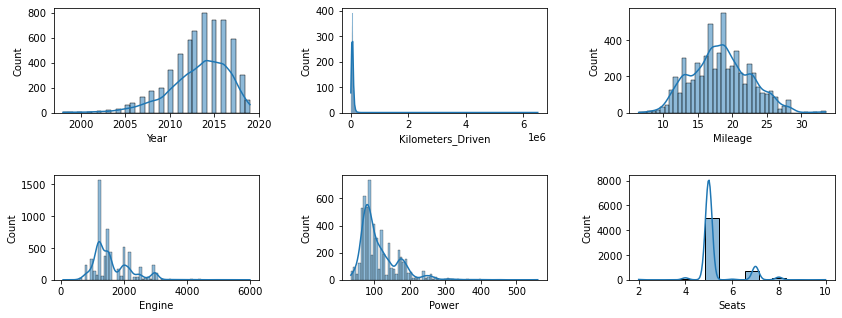

In [25]:
# check distribution plots for all numerical features

# create 2x3 grid master plot with 6 subplots

fig1 = plt.figure(figsize=[14,5])
fig1.subplots_adjust(hspace=0.6, wspace=0.4)

fig1.add_subplot(2,3,1)   
sns.histplot(df0.Year, kde=True);
fig1.add_subplot(2,3,2)
sns.histplot(df0.Kilometers_Driven, kde=True);
fig1.add_subplot(2,3,3)
sns.histplot(df0.Mileage, kde=True);
fig1.add_subplot(2,3,4)
sns.histplot(df0.Engine, kde=True);
fig1.add_subplot(2,3,5)
sns.histplot(df0.Power, kde=True);
fig1.add_subplot(2,3,6)
sns.histplot(df0.Seats, kde=True);

plt.show()

#### Observations
- Most of the numerical features are skewed left or right.
- Therefore median seems to be the best measure of central tendency for imputing missing values appropriately.
- Boxplot below of Kilometers_Driven indicates a potential outlier; need to investigate further.

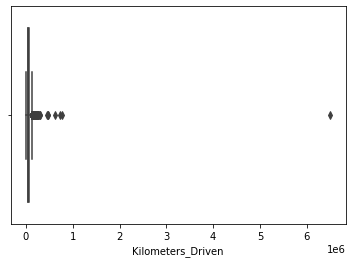

In [26]:
sns.boxplot(df0['Kilometers_Driven']);   # check boxplot of Kilometers_Driven for outliers

In [27]:
df0.query('Kilometers_Driven == 6500000.0')   # find the specific row with potential outlier

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
2328,2328,BMW X5 xDrive 30d M Sport,Chennai,2017,6500000,Diesel,Automatic,First,15.97,2993.0,258.0,5.0,65.0


#### Observations
- Apart from erroneous value in Kilometers_Driven all other data seems valid, therefore treat outlier as missing value.
- Accordingly, assign null value and then impute with median as with all missing values.

In [28]:
df0.loc[2328,'Kilometers_Driven'] = np.nan   # treat as missing value and convert to null (NaN)

In [29]:
# impute missing data with median values for the below numerical features

df0['Kilometers_Driven'] = df0['Kilometers_Driven'].fillna(df0['Kilometers_Driven'].median())
df0['Mileage'] = df0['Mileage'].fillna(df0['Mileage'].median())
df0['Engine'] = df0['Engine'].fillna(df0['Engine'].median())
df0['Power'] = df0['Power'].fillna(df0['Power'].median())
df0['Seats'] = df0['Seats'].fillna(df0['Seats'].median())

In [30]:
df0.isnull().sum()   # check updated missing values

S.No.                0
Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

In [31]:
df0.describe(include='all').T   # check updated statistical summary

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
S.No.,6019.0,NaN,NaN,NaN,3009.0,1737.679967,0.0,1504.5,3009.0,4513.5,6018.0
Name,6019,1876,Mahindra XUV500 W8 2WD,49,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Location,6019,11,Mumbai,790,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,6019.0,NaN,NaN,NaN,2013.358199,3.269742,1998.0,2011.0,2014.0,2016.0,2019.0
Kilometers_Driven,6019.0,NaN,NaN,NaN,57667.272138,37875.683713,171.0,34000.0,53000.0,73000.0,775000.0
Fuel_Type,6019,5,Diesel,3205,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Transmission,6019,2,Manual,4299,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Owner_Type,6019,4,First,4929,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mileage,6019.0,NaN,NaN,NaN,18.340598,4.151148,6.4,15.4,18.2,21.1,33.54
Engine,6019.0,NaN,NaN,NaN,1620.509221,599.635458,72.0,1198.0,1493.0,1969.0,5998.0


#### Observations
- Car brand probably has significant pull when pricing used cars, therefore we need to have a 'Make' feature.
- Extract Make info from Name into new categorical column, then drop Name.
- Drop S.No. as it is insignificant and has no analytical value to the model.

In [32]:
df0['Make'] = df0['Name'].str.split(' ').str[0]   # extract Make of car from the Name column
df0['Make'] = df0['Make'].astype('category')   # create new categorical variable column for Make 

In [33]:
df0['Make'].unique().value_counts()   # check unique values in Make column

Maruti           1
Hyundai          1
Honda            1
Audi             1
Nissan           1
Toyota           1
Volkswagen       1
Tata             1
Land             1
Mitsubishi       1
Renault          1
Mercedes-Benz    1
BMW              1
Mahindra         1
Ford             1
Porsche          1
Datsun           1
Jaguar           1
Volvo            1
Chevrolet        1
Skoda            1
Mini             1
Fiat             1
Jeep             1
Smart            1
Ambassador       1
Isuzu            1
ISUZU            1
Force            1
Bentley          1
Lamborghini      1
dtype: int64

In [34]:
df0.loc[df0['Make'] == 'ISUZU','Make'] = 'Isuzu'   # resolve duplicate value of Isuzu

In [35]:
df0['Make'].nunique()   # check updated unique value count

30

In [36]:
df0.drop(['S.No.'], axis=1, inplace=True)   # drop S.No.
df0.drop(['Name'], axis=1, inplace=True)   # drop Name

In [37]:
df0.describe(include='all').T   # check updated statistical summary

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Location,6019,11,Mumbai,790,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,6019.0,NaN,NaN,NaN,2013.358199,3.269742,1998.0,2011.0,2014.0,2016.0,2019.0
Kilometers_Driven,6019.0,NaN,NaN,NaN,57667.272138,37875.683713,171.0,34000.0,53000.0,73000.0,775000.0
Fuel_Type,6019,5,Diesel,3205,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Transmission,6019,2,Manual,4299,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Owner_Type,6019,4,First,4929,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mileage,6019.0,NaN,NaN,NaN,18.340598,4.151148,6.4,15.4,18.2,21.1,33.54
Engine,6019.0,NaN,NaN,NaN,1620.509221,599.635458,72.0,1198.0,1493.0,1969.0,5998.0
Power,6019.0,NaN,NaN,NaN,112.883539,53.283701,34.2,78.0,97.7,138.03,560.0
Seats,6019.0,NaN,NaN,NaN,5.277621,0.803479,2.0,5.0,5.0,5.0,10.0


In [38]:
df0.head()   # check updated dataframe feature columns

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Make
0,Mumbai,2010,72000.0,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,Maruti
1,Pune,2015,41000.0,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,Hyundai
2,Chennai,2011,46000.0,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,Honda
3,Chennai,2012,87000.0,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,Maruti
4,Coimbatore,2013,40670.0,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,Audi


### Exploratory Data Analysis

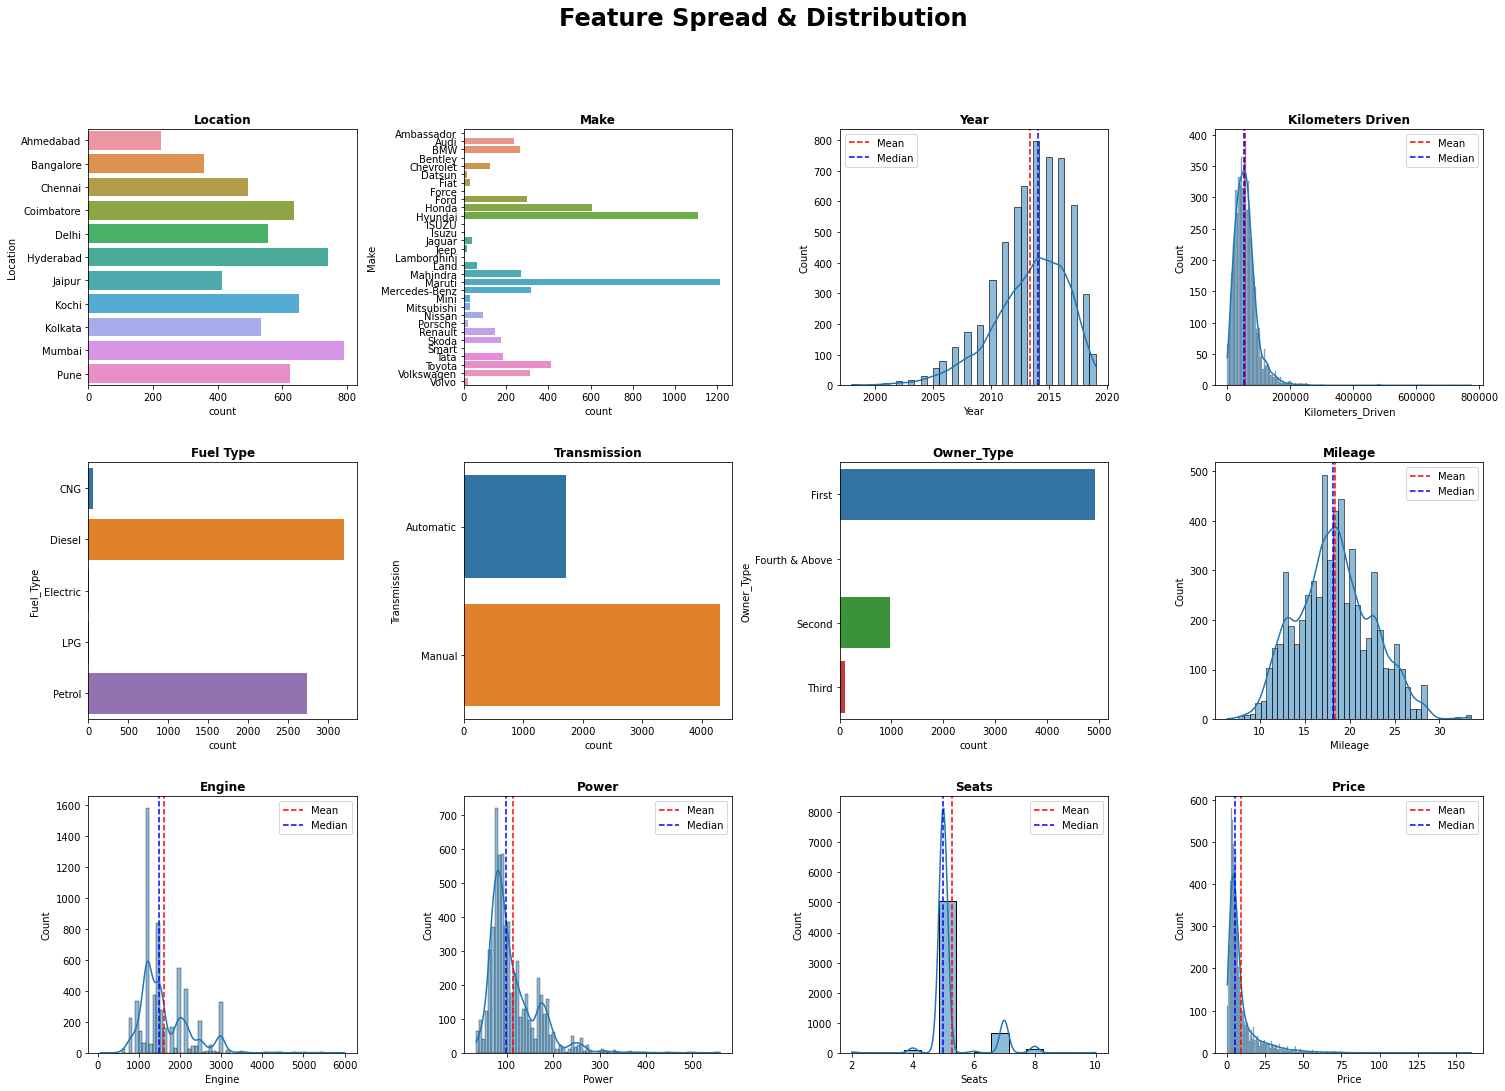

In [39]:
# create updated distribution plots for all features numerical and categorical

# create 3x4 grid master plot with 11 subplots

fig2 = plt.figure(figsize=[25,17])   
fig2.subplots_adjust(hspace=0.3, wspace=0.4)
fig2.suptitle("Feature Spread & Distribution", fontweight='bold', fontsize='24')

feat1 = fig2.add_subplot(3,4,1)
sns.countplot(y='Location', data=df0, ax=feat1);
feat1.set_title('Location', fontweight='bold')

feat2 = fig2.add_subplot(3,4,2)
sns.countplot(y='Make', data=df0, ax=feat2);
feat2.set_title('Make', fontweight='bold')

feat3 = fig2.add_subplot(3,4,3)
sns.histplot(df0.Year, kde=True, ax=feat3);
feat3.set_title('Year', fontweight='bold')
feat3.axvline(df0['Year'].mean(), color='red', linestyle='--', label='Mean')
feat3.axvline(df0['Year'].median(), color='blue', linestyle='--', label='Median')
feat3.legend()

feat4 = fig2.add_subplot(3,4,4)
sns.histplot(df0.Kilometers_Driven, kde=True, ax=feat4);
feat4.set_title('Kilometers Driven', fontweight='bold')
feat4.axvline(df0['Kilometers_Driven'].mean(), color='red', linestyle='--', label='Mean')
feat4.axvline(df0['Kilometers_Driven'].median(), color='blue', linestyle='--', label='Median')
feat4.legend()

feat5 = fig2.add_subplot(3,4,5)
sns.countplot(y='Fuel_Type', data=df0, ax=feat5);
feat5.set_title('Fuel Type', fontweight='bold')

feat6 = fig2.add_subplot(3,4,6)
sns.countplot(y='Transmission', data=df0, ax=feat6);
feat6.set_title('Transmission', fontweight='bold')

feat7 = fig2.add_subplot(3,4,7)
sns.countplot(y='Owner_Type', data=df0, ax=feat7);
feat7.set_title('Owner_Type', fontweight='bold')

feat8 = fig2.add_subplot(3,4,8)
sns.histplot(df0.Mileage, kde=True, ax=feat8);
feat8.set_title('Mileage', fontweight='bold')
feat8.axvline(df0['Mileage'].mean(), color='red', linestyle='--', label='Mean')
feat8.axvline(df0['Mileage'].median(), color='blue', linestyle='--', label='Median')
feat8.legend()

feat9 = fig2.add_subplot(3,4,9)
sns.histplot(df0.Engine, kde=True, ax=feat9);
feat9.set_title('Engine', fontweight='bold')
feat9.axvline(df0['Engine'].mean(), color='red', linestyle='--', label='Mean')
feat9.axvline(df0['Engine'].median(), color='blue', linestyle='--', label='Median')
feat9.legend()

feat10 = fig2.add_subplot(3,4,10)
sns.histplot(df0.Power, kde=True, ax=feat10);
feat10.set_title('Power', fontweight='bold')
feat10.axvline(df0['Power'].mean(), color='red', linestyle='--', label='Mean')
feat10.axvline(df0['Power'].median(), color='blue', linestyle='--', label='Median')
feat10.legend()

feat11 = fig2.add_subplot(3,4,11)
sns.histplot(df0.Seats, kde=True, ax=feat11);
feat11.set_title('Seats', fontweight='bold')
feat11.axvline(df0['Seats'].mean(), color='red', linestyle='--', label='Mean')
feat11.axvline(df0['Seats'].median(), color='blue', linestyle='--', label='Median')
feat11.legend()

feat12 = fig2.add_subplot(3,4,12)
sns.histplot(df0.Price, kde=True, ax=feat12);
feat12.set_title('Price', fontweight='bold')
feat12.axvline(df0['Price'].mean(), color='red', linestyle='--', label='Mean')
feat12.axvline(df0['Price'].median(), color='blue', linestyle='--', label='Median')
feat12.legend()

plt.show()

#### Observations
- Mumbai has the most used car availability, whereas Ahmedabad has the least.
- Maruti and Hyundai seem to be the most popular brands.
- Age of used cars is concentrated between 2-10 years.
- Diesel and Petrol are the predominantly used fuel types. 
- Cars with Manual transmission significantly more in quantity than Automatic (norm in India).
- Majority of used cars have had only one previous owner.
- Used cars with 5 seats seem to be the most popular (most bang for the buck).

In [40]:
df0.corr().round(3)   # check pairwise correlation

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
Year,1.000,-0.448,0.291,-0.050,0.024,0.015,0.305
Kilometers_Driven,-0.448,1.000,-0.139,0.154,0.000,0.212,-0.168
Mileage,0.291,-0.139,1.000,-0.639,-0.546,-0.345,-0.330
Engine,-0.050,0.154,-0.639,1.000,0.860,0.397,0.657
Power,0.024,0.000,-0.546,0.860,1.000,0.103,0.770
Seats,0.015,0.212,-0.345,0.397,0.103,1.000,0.054
Price,0.305,-0.168,-0.330,0.657,0.770,0.054,1.000


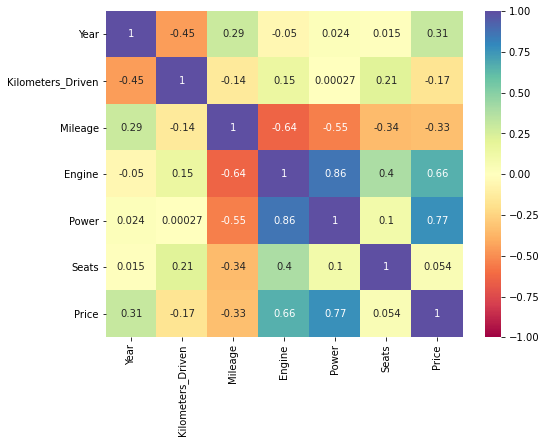

In [41]:
plt.figure(figsize=(8,6))
sns.heatmap(df0.corr(), annot=True, vmin=-1, vmax=1, cmap='Spectral');   # generate heatmap for pairwise correlation

#### Observations
- Price has strong positive correlation with Engine and Power.
- Price has weak positive correlation with model Year.
- Price has weak negative correlation with Kilometers_Driven.
- Price has no correlation with number of Seats.

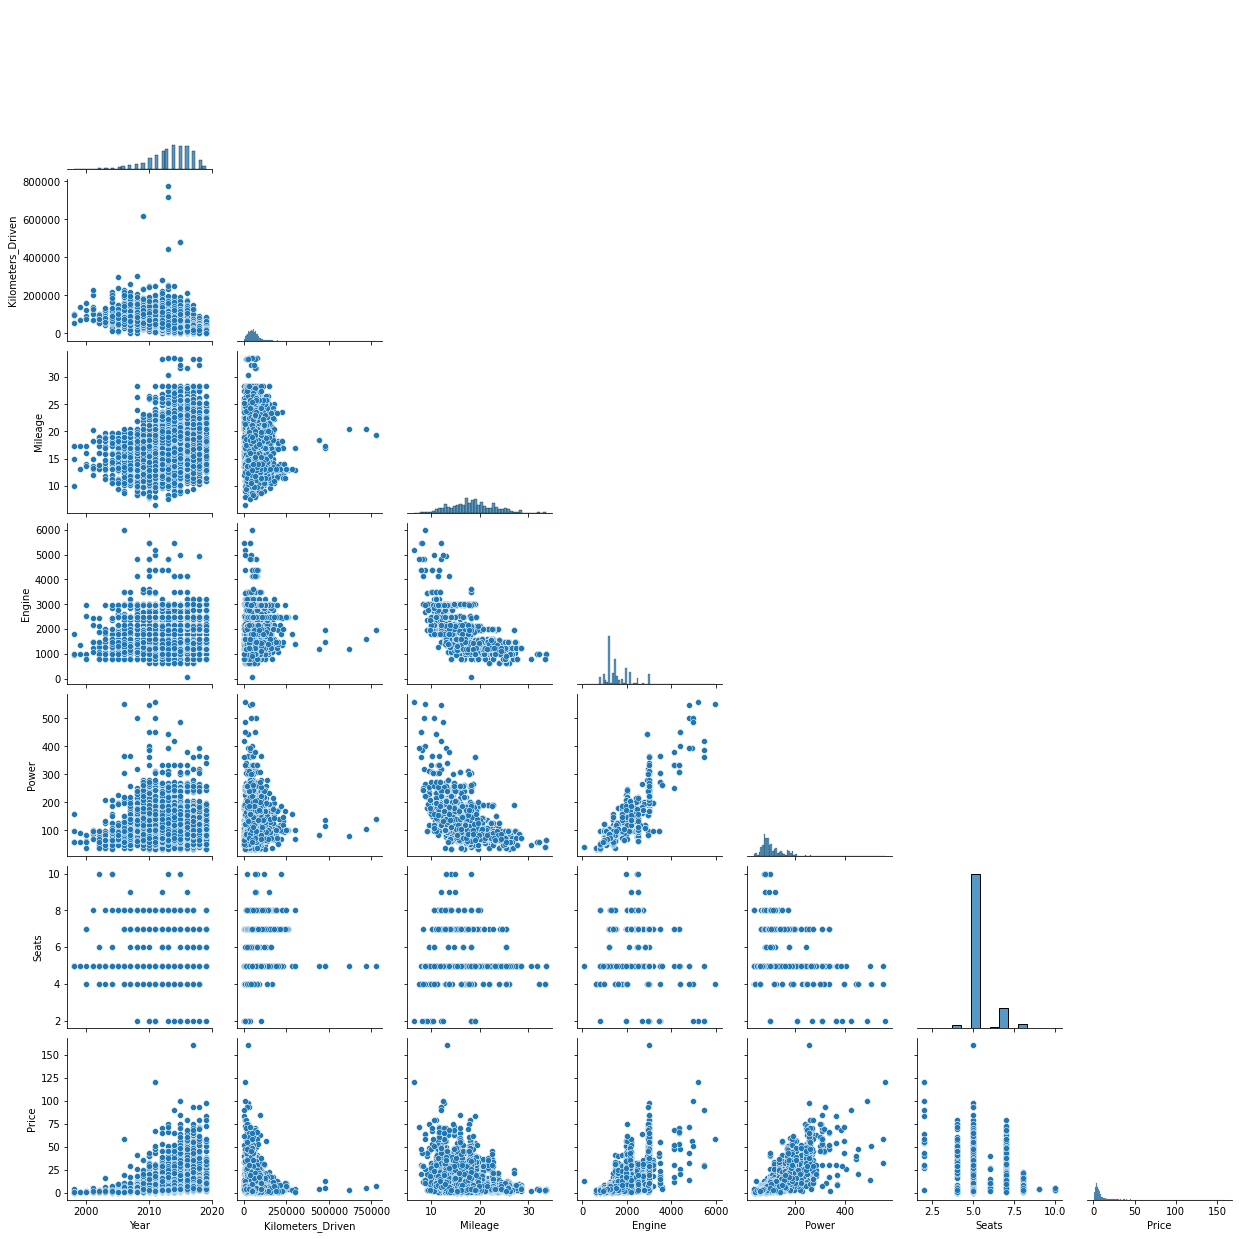

In [42]:
sns.pairplot(df0, corner=True);   # generate pairplot

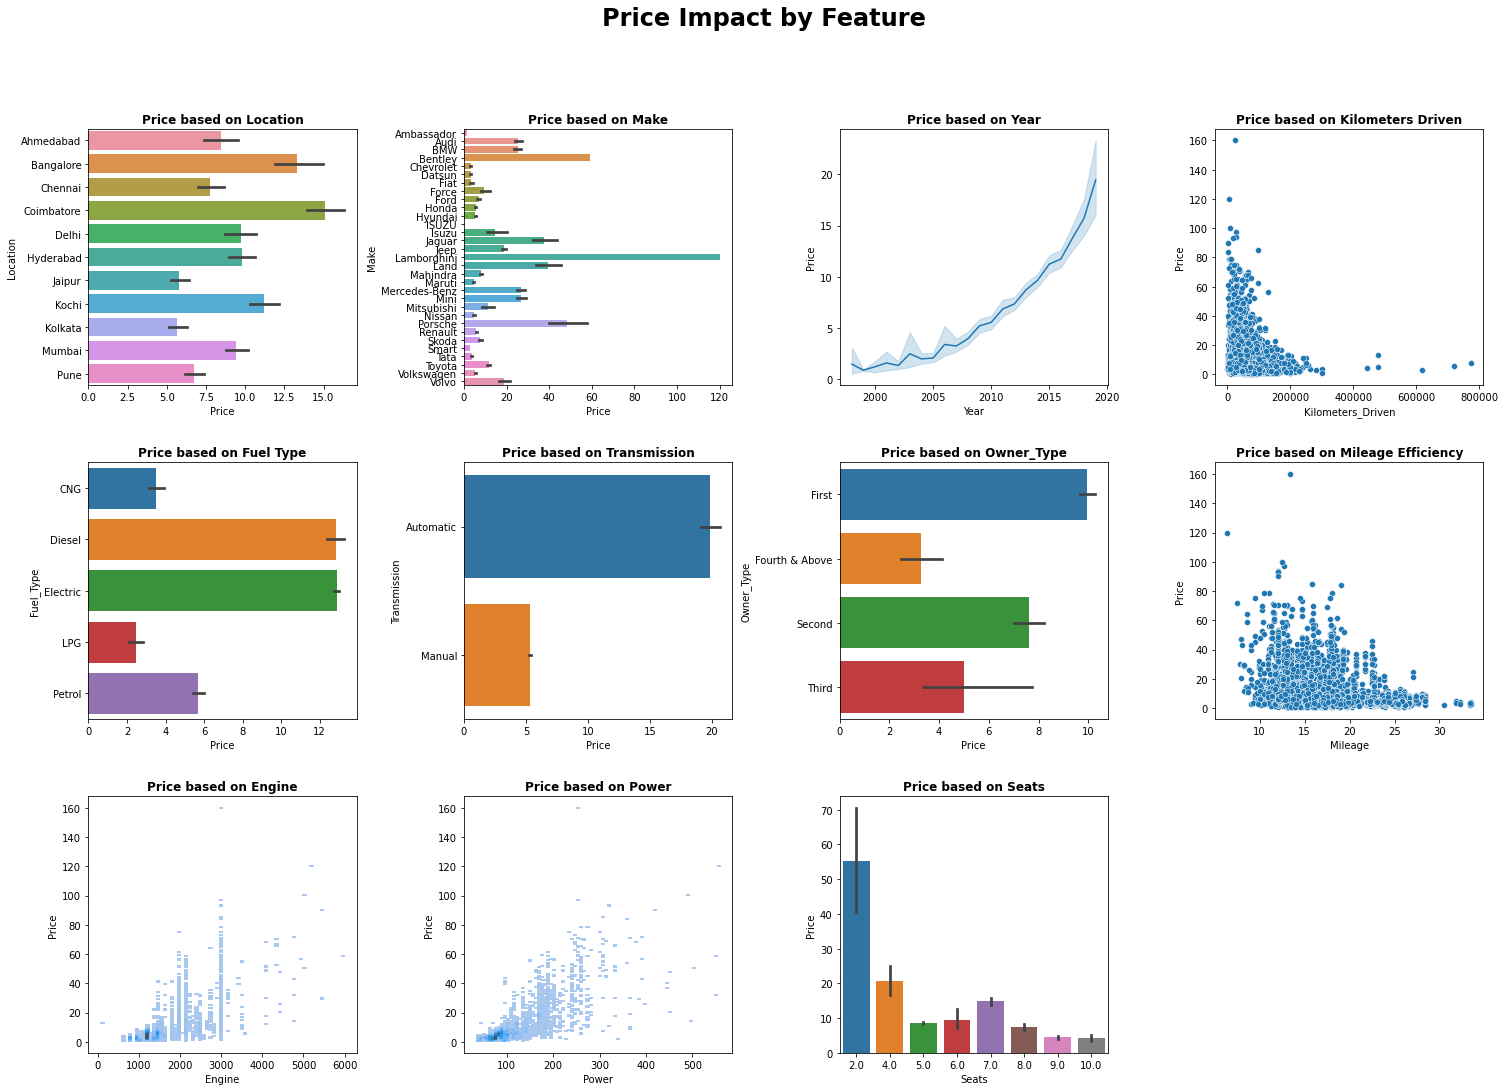

In [43]:
# create bivariate plots plotting impact of each independent variable on target variable Price 

# create 3x4 grid master plot with 11 subplots

fig3 = plt.figure(figsize=[25,17])
fig3.subplots_adjust(hspace=0.3, wspace=0.4)
fig3.suptitle("Price Impact by Feature", fontweight='bold', fontsize='24')

feat13 = fig3.add_subplot(3,4,1)
sns.barplot(y='Location', x='Price', data=df0, ax=feat13);
feat13.set_title('Price based on Location', fontweight='bold')

feat14 = fig3.add_subplot(3,4,2)
sns.barplot(y='Make', x='Price', data=df0, ax=feat14);
feat14.set_title('Price based on Make', fontweight='bold')

feat15 = fig3.add_subplot(3,4,3)
sns.lineplot(x='Year', y='Price', data=df0, ax=feat15);
feat15.set_title('Price based on Year', fontweight='bold')

feat16 = fig3.add_subplot(3,4,4)
sns.scatterplot(x='Kilometers_Driven', y='Price', data=df0, ax=feat16);
feat16.set_title('Price based on Kilometers Driven', fontweight='bold')

feat17 = fig3.add_subplot(3,4,5)
sns.barplot(y='Fuel_Type', x='Price', data=df0, ax=feat17);
feat17.set_title('Price based on Fuel Type', fontweight='bold')

feat18 = fig3.add_subplot(3,4,6)
sns.barplot(y='Transmission', x='Price', data=df0, ax=feat18);
feat18.set_title('Price based on Transmission', fontweight='bold')

feat19 = fig3.add_subplot(3,4,7)
sns.barplot(y='Owner_Type', x='Price', data=df0, ax=feat19);
feat19.set_title('Price based on Owner_Type', fontweight='bold')

feat20 = fig3.add_subplot(3,4,8)
sns.scatterplot(x='Mileage', y='Price', data=df0, ax=feat20);
feat20.set_title('Price based on Mileage Efficiency', fontweight='bold')

feat21 = fig3.add_subplot(3,4,9)
sns.histplot(x='Engine', y='Price', data=df0, ax=feat21);
feat21.set_title('Price based on Engine', fontweight='bold')

feat22 = fig3.add_subplot(3,4,10)
sns.histplot(x='Power', y='Price', data=df0, ax=feat22);
feat22.set_title('Price based on Power', fontweight='bold')

feat23 = fig3.add_subplot(3,4,11)
sns.barplot(x='Seats', y='Price', data=df0, ax=feat23);
feat23.set_title('Price based on Seats', fontweight='bold')

plt.show()

#### Observations
- Bangalore and Coimbatore have higher used car prices.
- Used car pricing increases exponentially the newer the car. 
- Diesel and Electric cars are more expensive.
- Automatic Transmission cars are more expensive (considered luxury in India).
- Used car pricing drops with every additional owner.
- Price increases with higher performance (Engine and Power).
- 2-seater cars are significantly more expensive (most probably premium sports models).

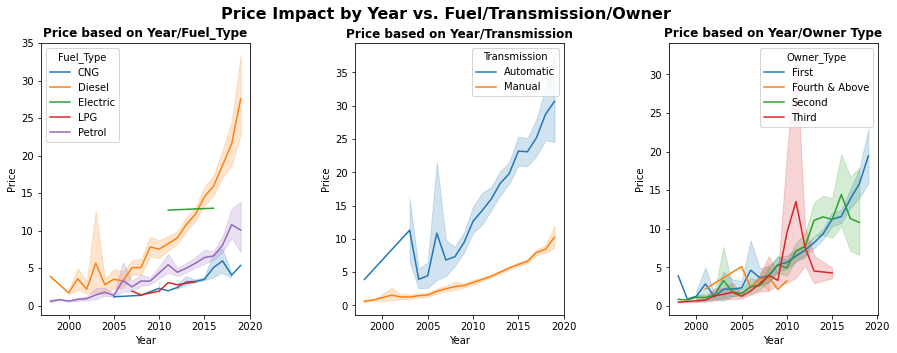

In [44]:
# create multivariate plots showing impact on Price vs. Year based on Fuel Type, Transmission and Owner_Type

# create 1x3 grid master plot with 3 subplots

fig4 = plt.figure(figsize=[15,5])
fig4.subplots_adjust(hspace=0.5, wspace=0.5)
fig4.suptitle("Price Impact by Year vs. Fuel/Transmission/Owner", fontweight='bold', fontsize='16')

feat24 = fig4.add_subplot(1,3,1)
sns.lineplot(x='Year', y='Price', hue='Fuel_Type', data=df0, ax=feat24);
feat24.set_title('Price based on Year/Fuel_Type', fontweight='bold')

feat25 = fig4.add_subplot(1,3,2)
sns.lineplot(x='Year', y='Price', hue='Transmission', data=df0, ax=feat25);
feat25.set_title('Price based on Year/Transmission', fontweight='bold')

feat26 = fig4.add_subplot(1,3,3)
sns.lineplot(x='Year', y='Price', hue='Owner_Type', data=df0, ax=feat26);
feat26.set_title('Price based on Year/Owner Type', fontweight='bold')

plt.show()

#### Observations
- Diesel car prices increase exponentially the newer the car.
- Automatic transmission car prices increase sharply the newer the car.
- One owner car prices increase exponentially the newer the car.

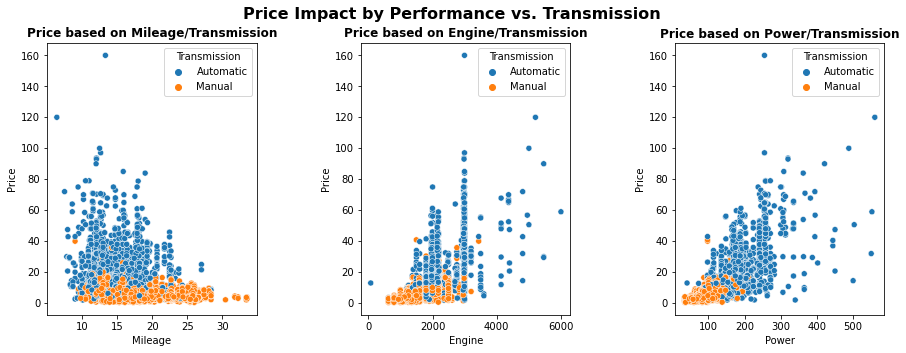

In [45]:
# create multivariate plots showing impact on Price vs. Performance based on Transmission

# create 1x3 grid master plot with 3 subplots

fig5 = plt.figure(figsize=[15,5])
fig5.subplots_adjust(hspace=0.5, wspace=0.5)
fig5.suptitle("Price Impact by Performance vs. Transmission", fontweight='bold', fontsize='16')

feat27 = fig5.add_subplot(1,3,1)
sns.scatterplot(x='Mileage', y='Price', hue='Transmission', data=df0, ax=feat27);
feat27.set_title('Price based on Mileage/Transmission', fontweight='bold')

feat28 = fig5.add_subplot(1,3,2)
sns.scatterplot(x='Engine', y='Price', hue='Transmission', data=df0, ax=feat28);
feat28.set_title('Price based on Engine/Transmission', fontweight='bold')

feat29 = fig5.add_subplot(1,3,3)
sns.scatterplot(x='Power', y='Price', hue='Transmission', data=df0, ax=feat29);
feat29.set_title('Price based on Power/Transmission', fontweight='bold')

plt.show()

#### Observations
- Mileage efficiency does not influence used car pricing much. 
- High performance (Engine, Power) cars command higher pricing.
- However most high performance cars have only Automatic transmission (considered luxury/premium).

### Preparing Data for Modeling

In [46]:
# perform log transformations of Power, Engine, Kilometers_Driven and Price to reduce skewness

df0['Power'] = np.log(df0['Power'])
df0['Engine'] = np.log(df0['Engine'])
df0['Kilometer_Driven'] = np.log(df0['Kilometers_Driven'])
df0['Price'] = np.log(df0['Price'])

In [47]:
df0.info()   # recheck missing values and datatypes 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6019 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Location           6019 non-null   category
 1   Year               6019 non-null   int64   
 2   Kilometers_Driven  6019 non-null   float64 
 3   Fuel_Type          6019 non-null   category
 4   Transmission       6019 non-null   category
 5   Owner_Type         6019 non-null   category
 6   Mileage            6019 non-null   float64 
 7   Engine             6019 non-null   float64 
 8   Power              6019 non-null   float64 
 9   Seats              6019 non-null   float64 
 10  Price              6019 non-null   float64 
 11  Make               6019 non-null   category
 12  Kilometer_Driven   6019 non-null   float64 
dtypes: category(5), float64(7), int64(1)
memory usage: 583.8 KB


In [48]:
# create dummy variables for all categorical variables while dropping the first one-hot encoded column
# assign to new dataframe version

df1 = pd.get_dummies(data=df0, columns=['Location', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Make'], drop_first=True)

In [49]:
df1.head()   # check updated feature columns with dummy variables

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Kilometer_Driven,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,Make_Audi,Make_BMW,Make_Bentley,Make_Chevrolet,Make_Datsun,Make_Fiat,Make_Force,Make_Ford,Make_Honda,Make_Hyundai,Make_ISUZU,Make_Isuzu,Make_Jaguar,Make_Jeep,Make_Lamborghini,Make_Land,Make_Mahindra,Make_Maruti,Make_Mercedes-Benz,Make_Mini,Make_Mitsubishi,Make_Nissan,Make_Porsche,Make_Renault,Make_Skoda,Make_Smart,Make_Tata,Make_Toyota,Make_Volkswagen,Make_Volvo
0,2010,72000.0,26.60,6.905753,4.063198,5.0,0.559616,11.184421,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,2015,41000.0,19.67,7.366445,4.837868,5.0,2.525729,10.621327,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2011,46000.0,18.20,7.089243,4.485260,5.0,1.504077,10.736397,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2012,87000.0,20.77,7.129298,4.485936,7.0,1.791759,11.373663,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,2013,40670.0,15.20,7.584773,4.947340,5.0,2.875822,10.613246,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Model Building & Performance Evaluation 

In [50]:
# split the dataset by independent variables and dependent variable

X = df1.drop(['Price'], axis=1)   # independent variables
y = df1['Price']   # dependent variable Price

In [51]:
# split the dataset in 70:30 ratio for training to testing dataset

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [52]:
# intialize the regression model to fit the training dataset

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [53]:
# get R-squared scores of training set and testing set

print("R-squared score on training set is", regression_model.score(X_train, y_train))
print("R-squared score on testing set is", regression_model.score(X_test, y_test))

R-squared score on training set is 0.9296779928176142
R-squared score on testing set is 0.9390818558800078


In [54]:
# get Root Mean Square Error (RMSE) of training set and testing set

print("Root Mean Square Error (RMSE) on the training set is", 
      np.sqrt(mean_squared_error(y_train, regression_model.predict(X_train))))
print("Root Mean Square Error (RMSE) on the testing set is", 
      np.sqrt(mean_squared_error(y_test, regression_model.predict(X_test))))

Root Mean Square Error (RMSE) on the training set is 0.2313091153726389
Root Mean Square Error (RMSE) on the testing set is 0.2165846689899875


In [55]:
# get Mean Absolute Error (MAE) of training set and testing set

print("Mean Absolute Error (MAE) on the training set is",
      mean_absolute_error(y_train, regression_model.predict(X_train)))
print("Mean Absolute Error (MAE) on the testing set is",
      mean_absolute_error(y_test, regression_model.predict(X_test)))

Mean Absolute Error (MAE) on the training set is 0.1705309987578405
Mean Absolute Error (MAE) on the testing set is 0.16390547683336418


#### Observations
- R-squared scores are high and very close between training and testing sets.
- RMSE and MAE are low and also very close between training and testing sets.
- All stats indicate that the model performance is very good to begin with. 

In [56]:
# calculate model Coefficients and Intercept for the training set

coef_df1 = pd.DataFrame(np.append(regression_model.coef_, regression_model.intercept_),
    index = X_train.columns.tolist() + ["INTERCEPT"], columns=["COEFFICIENTS"])

coef_df1

,COEFFICIENTS
Year,1.152354e-01
Kilometers_Driven,-2.890629e-07
Mileage,-8.621246e-03
Engine,3.676684e-01
Power,6.814630e-01
Seats,3.835715e-02
Kilometer_Driven,-6.842474e-02
Location_Bangalore,1.831688e-01
Location_Chennai,3.799250e-02
Location_Coimbatore,1.382606e-01


In [57]:
# generate the equation of linear regression model for training set

Equation = "Price = " + str(regression_model.intercept_)
print(Equation, end=" ")

for i in range(len(X_train.columns)):
    if i != len(X_train.columns) - 1:
        print("+ (", regression_model.coef_[i],")*(", X_train.columns[i],")", end="  ")
    else:
        print("+ (", regression_model.coef_[i],")*(", X_train.columns[i],")")

Price = -234.84154417479726 + ( 0.11523542727605084 )*( Year )  + ( -2.8906285545762983e-07 )*( Kilometers_Driven )  + ( -0.008621245985233596 )*( Mileage )  + ( 0.3676683695404467 )*( Engine )  + ( 0.6814630098587979 )*( Power )  + ( 0.038357146742145576 )*( Seats )  + ( -0.0684247444521141 )*( Kilometer_Driven )  + ( 0.18316882491009331 )*( Location_Bangalore )  + ( 0.03799249571101765 )*( Location_Chennai )  + ( 0.13826057623904292 )*( Location_Coimbatore )  + ( -0.05583705533056737 )*( Location_Delhi )  + ( 0.1474226884841917 )*( Location_Hyderabad )  + ( -0.026102542511457515 )*( Location_Jaipur )  + ( -0.012515726597373461 )*( Location_Kochi )  + ( -0.2193536155476812 )*( Location_Kolkata )  + ( -0.0375796713127319 )*( Location_Mumbai )  + ( -0.0255193623551318 )*( Location_Pune )  + ( 0.13478681515243326 )*( Fuel_Type_Diesel )  + ( 1.0662439678241353 )*( Fuel_Type_Electric )  + ( 0.007898538432816156 )*( Fuel_Type_LPG )  + ( -0.0770883521928328 )*( Fuel_Type_Petrol )  + ( -0.095

### Conclusion

#### Insights
- Used car sales and demand are higher in cities like Mumbai, Bangalore, Hyderabad, Pune and Kochi; I would surmise that these cities are major tech and/or finance hubs, therefore have a higher educated, white collar population segment with more disposable income.
- Used car sales were lowest in Ahmedabad, Bangalore and Jaipur; Bangalore came as a surprise considering it's also a major tech hub of India. Need to understand why it's an exception.
- Maruti, Hyundai, Honda and Toyota are the most popular brands, most likely due to reasonable pricing and long-term reliability.
- Cars with 5 seats are the most popular due to the extra space to accommodate more passengers.
- Newer Diesel cars are significantly more expensive than the newer Petrol cars. 
- Majority of cars in India have manual transmission (this is the cultural norm); automatic transmission is considered a luxury feature and will command a premium.

#### Recommendations
- India is an emerging and developing nation yet one of the world's fastest growing economies. But it's important to bear in mind that majority of Indians fall in the lower, lower middle and middle class. The middle class is growing rapidly and starting to have more disposable income. But still for most of these households, this will be the first time to own a car.
- Therefore, affordability, reliability, function and utility will be key factors for this new growing segment of customers.
- Luxury brand and high performance cars are considered status symbols and can only be afforded by the upper class, which makes up a very small percentage of the population. And in any case these customers would prefer to purchase a brand new car over a used car.